## Simple visualization of the flow based domain

This notebook contains an example on how the flow-based domain would look like on a selected timestamp considering only the variables occurring in a 2D domain.

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Load data
path = os.getcwd() 
df = pd.read_csv(path+'/data/InitialComputation 2024-10-11 0000 - 2024-10-11 0100.csv', sep=';')

In [5]:
# clean df
df = df[['DateTimeUtc',
           'Tso',
           'CneName',
           'HubFrom', 
           'HubTo',
           'Ram',
           'U',
           'Ptdf_ALDE',
           'Ptdf_AT',
           'Ptdf_BE',
           'Ptdf_CZ',
           'Ptdf_DE',
           'Ptdf_FR',
           'Ptdf_HR',
           'Ptdf_HU',
           'Ptdf_NL',
           'Ptdf_PL',
           'Ptdf_RO',
           'Ptdf_SI',
           'Ptdf_SK',    
           ]]

df = df.dropna()

# Let's work on the example FR->BE

We will simplify the calculations for this example. To give a realistic 2D domain, we would have to compute the whole flow based domain and plot the 2D domain we would like to visualize. In this case we will only consider the PTDFs from Belgium and France  

In [6]:
# compute Z2Z PTDFs

df['FR->BE'] = df['Ptdf_BE']-df['Ptdf_FR']
df['BE->NL'] = df['Ptdf_NL']-df['Ptdf_BE']


df_FRBENL = df.loc[df['Tso'].isin(['RTE', 'ELIA', 'TENNET'])]
df_FRBENL.head(5)

,DateTimeUtc,Tso,CneName,HubFrom,HubTo,Ram,U,Ptdf_ALDE,Ptdf_AT,Ptdf_BE,...,Ptdf_FR,Ptdf_HR,Ptdf_HU,Ptdf_NL,Ptdf_PL,Ptdf_RO,Ptdf_SI,Ptdf_SK,FR->BE,BE->NL
526,2024/10/10 22:00:00,ELIA,Achene - Lonny 380.19,BE,FR,2028.0,380.0,0.04836,-0.00357,0.12899,...,-0.07122,-0.00343,0.00090,0.07203,0.00849,0.00022,-0.00519,0.00310,0.20021,-0.05696
527,2024/10/10 22:00:00,ELIA,Achene - Lonny 380.19,BE,FR,1013.0,380.0,-0.04836,0.00357,-0.12899,...,0.07122,0.00343,-0.00090,-0.07203,-0.00849,-0.00022,0.00519,-0.00310,-0.20021,0.05696
528,2024/10/10 22:00:00,ELIA,Avelgem - Avelin 380.80,BE,FR,3850.0,380.0,0.03621,-0.00280,0.12413,...,-0.08710,-0.00318,0.00086,0.08183,0.00770,0.00021,-0.00480,0.00287,0.21123,-0.04230
529,2024/10/10 22:00:00,ELIA,Avelgem - Avelin 380.80,BE,FR,1637.0,380.0,-0.03621,0.00280,-0.12413,...,0.08710,0.00318,-0.00086,-0.08183,-0.00770,-0.00021,0.00480,-0.00287,-0.21123,0.04230
530,2024/10/10 22:00:00,ELIA,Avelgem - Horta 380.101,BE,BE,2352.0,380.0,-0.02169,0.00180,-0.05528,...,0.04323,0.00183,-0.00049,-0.05274,-0.00452,-0.00012,0.00277,-0.00166,-0.09851,0.00254


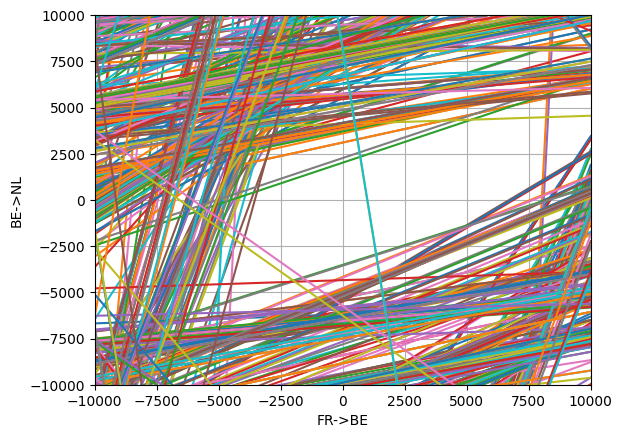

<Figure size 1000x500 with 0 Axes>

In [7]:
# plot domain
x = np.linspace(-10000, 10000, 100)

for i in range(0,len(df_FRBENL)):
    y_BEFR  = (df_FRBENL['Ram'].iloc[i]-x*df_FRBENL['FR->BE'].iloc[i])/(df_FRBENL['BE->NL'].iloc[i])
    plt.plot(x, y_BEFR)


plt.grid()

plt.xlabel("FR->BE")
plt.ylabel("BE->NL")

plt.xlim([-10000, 10000])
plt.ylim([-10000, 10000])
fig = plt.figure(figsize = (10, 5))



# Show the plot
plt.show()
